# 5.2a、ARIMA模型拟合未知序列发展
## data_hw5-2b.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA

## 时序图、ACF图、PACF图

In [2]:
def drawer(input):
    plt.figure(figsize=(10,8))
    series = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    acf=plt.subplot2grid((2,2),(1,0))
    pacf=plt.subplot2grid((2,2),(1,1))
    series.plot(input, '*-')
    plot_acf(input,ax=acf)
    plot_pacf(input,ax=pacf)
    plt.show()
    plt.close()

## statsmodels自帶的LB test

In [3]:
def purerandtest(y):
    a,b=acorr_ljungbox(y,lags=None,boxpierce=False)
    LB_purerand=pd.DataFrame(np.c_[a,b],columns=['LB','Pvalue'])
    LB_purerand['lags']=range(1,len(a)+1)
    print('----time series: LB pure randomness test----')
    print(LB_purerand)

## 计算差分

In [4]:
def caculatediff(diff, step, input):
    if(step!=0):
        input = input[step:] - input[:-step]
    if (diff == 0):
        return input
    input = input[1:] - input[:-1]
    return caculatediff(diff - 1, 0, input)

## 对比图

In [5]:
def drawcompare(series, prediction):
    plt.plot(series, "*-", label='observe')
    plt.plot(prediction, label='fittes')
    plt.legend()
    plt.show()
    plt.close()

## 数据读取

D:\LanguageAndIDE\conda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


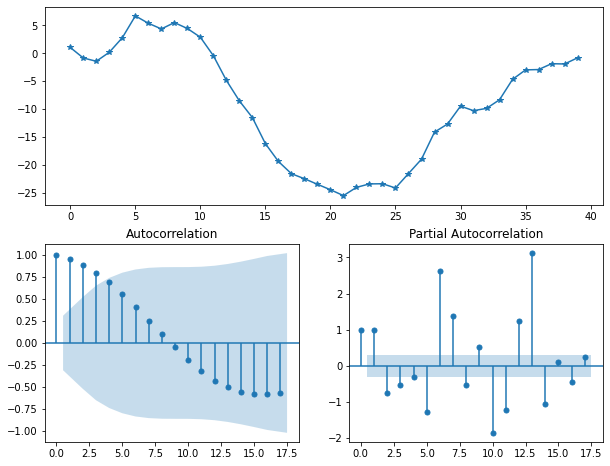

In [7]:
filename = "data_hw5-2b.csv"
series = pd.read_csv(filename, header=None)
series.iloc[:, 0] = series.iloc[:, 0].astype("float")
series = series.values[:, 0]
drawer(series)

## 2階差分与白噪声检验

D:\LanguageAndIDE\conda\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
D:\LanguageAndIDE\conda\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


----time series: LB pure randomness test----
           LB    Pvalue  lags
0    2.808656  0.093757     1
1    2.921775  0.232030     2
2    6.314475  0.097273     3
3    7.167835  0.127280     4
4    7.209245  0.205538     5
5    8.794051  0.185496     6
6   10.464895  0.163723     7
7   10.482882  0.232755     8
8   10.509682  0.310819     9
9   10.796402  0.373599    10
10  10.919887  0.449999    11
11  10.927407  0.535150    12
12  11.218324  0.592534    13
13  11.776007  0.624286    14
14  11.885897  0.687644    15
15  12.190523  0.730764    16
16  12.195969  0.788128    17


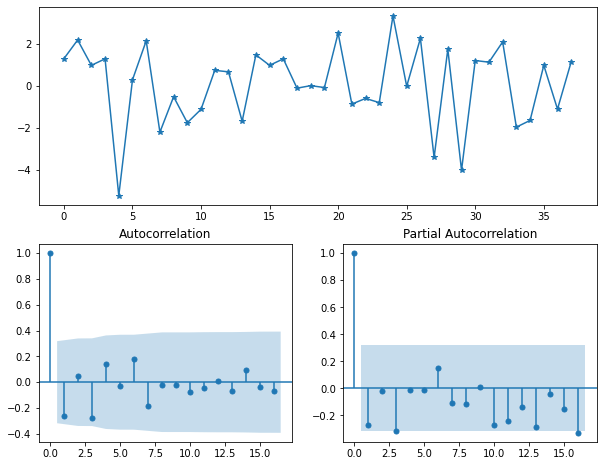

In [8]:
diff2 = caculatediff(2,0,series)
purerandtest(diff2)
drawer(diff2)

## ARIMA(p,d,q)建模參數估計

In [10]:
model = ARIMA(series, order=(1, 2, 1)).fit()
print('----fitting summary----')
print(model.summary())

----fitting summary----
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 -75.438
Date:                Wed, 17 Nov 2021   AIC                            156.877
Time:                        17:06:04   BIC                            161.789
Sample:                             0   HQIC                           158.625
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6713      0.229      2.934      0.003       0.223       1.120
ma.L1         -0.9449      0.169     -5.599      0.000      -1.276      -0.614
sigma2         3.0379      0

## 殘差白噪聲檢驗/模型顯著性檢驗

In [11]:
resid=model.resid
print('\n----residual pure randomness test')
purerandtest(resid)


----residual pure randomness test
----time series: LB pure randomness test----
           LB    Pvalue  lags
0    0.759526  0.383477     1
1    1.053798  0.590433     2
2    2.410828  0.491622     3
3    3.204712  0.524170     4
4    3.992039  0.550563     5
5    4.983096  0.545983     6
6    6.797811  0.450231     7
7    6.808020  0.557481     8
8    6.934357  0.643954     9
9    7.183702  0.707996    10
10   7.428676  0.763382    11
11   7.616451  0.814340    12
12   8.359284  0.819432    13
13   8.669230  0.851638    14
14   9.422136  0.854432    15
15  10.194095  0.856297    16
16  10.470666  0.882723    17
17  10.567322  0.911808    18


D:\LanguageAndIDE\conda\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
D:\LanguageAndIDE\conda\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


## 預測

In [15]:
prediction = model.get_prediction(start=0,end=len(series)-1+20,dynamic=False)
print('\n----fitted confidence interval: %d %%'%((1-0.05)*100))
print(prediction.summary_frame(alpha=0.05))


----fitted confidence interval: 95 %
y        mean      mean_se  mean_ci_lower  mean_ci_upper
0    0.000000  1414.214783   -2771.810041    2771.810041
1    1.575001   707.109441   -1384.334037    1387.484038
2   -2.729997     1.857915      -6.371443       0.911450
3   -2.209986     1.833890      -5.804345       1.384372
4    1.239875     1.816646      -2.320685       4.800436
5    4.718896     1.803738       1.183635       8.254156
6    9.737132     1.793769       6.221409      13.252855
7    4.438432     1.785884       0.938163       7.938700
8    3.613971     1.779528       0.126160       7.101781
9    6.382241     1.774325       2.904627       9.859855
10   3.675835     1.770014       0.206671       7.145000
11   1.697644     1.766405      -1.764446       5.159734
12  -2.967376     1.763357      -6.423493       0.488740
13  -8.287947     1.760764     -11.738982      -4.836913
14 -11.483178     1.758545     -14.929864      -8.036493
15 -14.030793     1.756636     -17.473736     -10.

## 畫圖

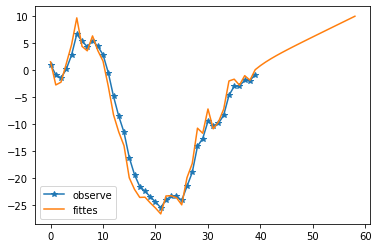

In [16]:
prediction = prediction.summary_frame(alpha=0.05).iloc[:,[0]]
prediction = prediction.values[:, 0]
drawcompare(series,prediction[1:])